In [1]:
import pandas as p
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as n

C:\Users\Vraviteja\AppData\Local\Temp\ipykernel_8124\3334478787.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as p


In [2]:
df=p.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.shape


(4340, 8)

In [3]:
print(df["seller_type"].unique())
print(df["transmission"].unique())
print(df["owner"].unique())
print(df["fuel"].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']


In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
fdf=df[['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
fdf['current_year']=2024
fdf.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024


In [8]:
fdf['no_years']=fdf['current_year']-fdf['year']
fdf.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_years
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2024,17
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2024,17
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2024,12
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2024,7
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2024,10


In [9]:
fdf.drop(['year'],axis=1,inplace=True)

In [10]:
fdf.drop(['current_year'],axis=1,inplace=True)

In [11]:
fdf.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
0,60000,70000,Petrol,Individual,Manual,First Owner,17
1,135000,50000,Petrol,Individual,Manual,First Owner,17
2,600000,100000,Diesel,Individual,Manual,First Owner,12
3,250000,46000,Petrol,Individual,Manual,First Owner,7
4,450000,141000,Diesel,Individual,Manual,Second Owner,10


In [12]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
lb=LabelEncoder()
columns_to_encode = fdf.columns[2:6]  # Specify the columns you want to encode

# Apply LabelEncoder to each selected column
for column in columns_to_encode:
    fdf[column] = LabelEncoder().fit_transform(fdf[column])


#fdf=p.get_dummies(fdf,drop_first=True)
fdf.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [13]:
fdf.corr()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


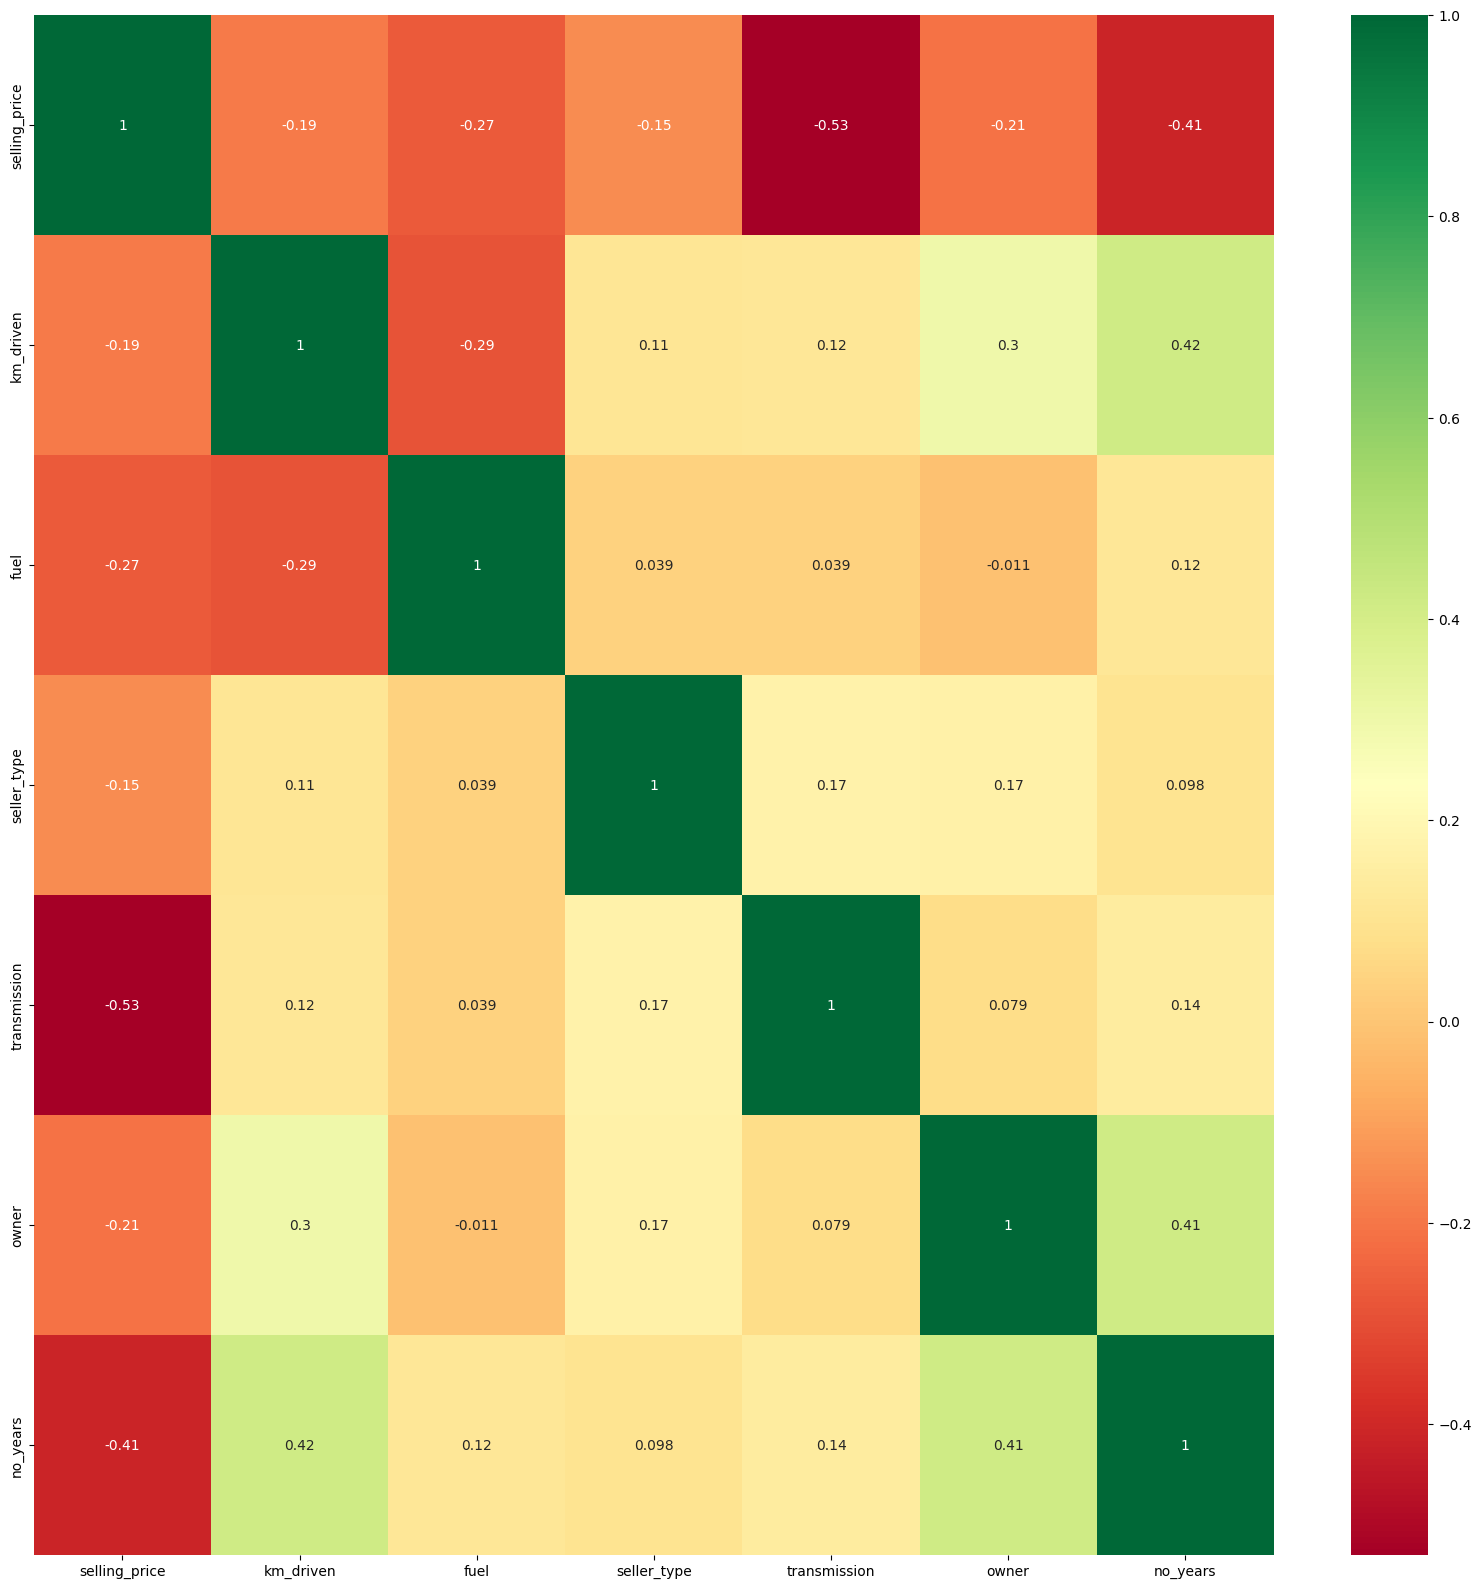

In [14]:
cor=fdf.corr()
tcf=cor.index
plt.figure(figsize=(20,20))
g=sns.heatmap(fdf[tcf].corr(),annot=True,cmap='RdYlGn')

In [15]:
fdf.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,no_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [16]:
x=fdf.iloc[:,1:]
y=fdf.iloc[:,:1]


In [17]:
x.head()

,km_driven,fuel,seller_type,transmission,owner,no_years
0,70000,4,1,1,0,17
1,50000,4,1,1,0,17
2,100000,1,1,1,0,12
3,46000,4,1,1,0,7
4,141000,1,1,1,2,10


In [18]:
y.head()

,selling_price
0,60000
1,135000
2,600000
3,250000
4,450000


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.24461461 0.12981564 0.05816077 0.29282837 0.03248945 0.24209116]


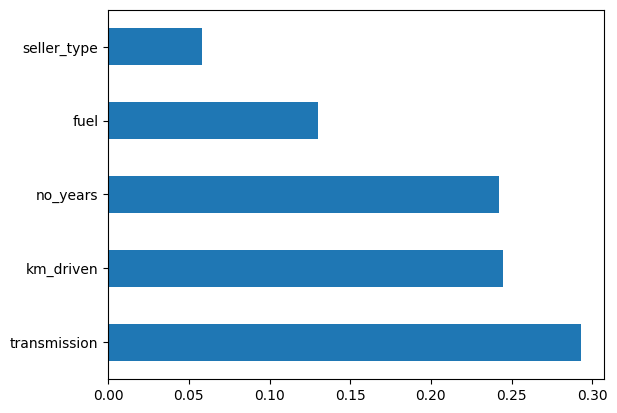

In [21]:
fimp=p.Series(model.feature_importances_,index=x.columns)
fimp.nlargest(5).plot(kind='barh')
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
y_train.shape

(3255, 1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [39]:
n_estimators=[int(i) for i in n.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(i) for i in n.linspace(5,30,num=6)]
min_samples_leaf=[1,2,5,7,10]
min_samples_split=[2,5,10,15,100]


In [40]:
from sklearn.model_selection import RandomizedSearchCV
rg={'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_leaf':min_samples_leaf,
    'min_samples_split':min_samples_split
    
}
print(rg)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_leaf': [1, 2, 5, 7, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [41]:
rf_random=RandomizedSearchCV(estimator=rfr,param_distributions=rg,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)


In [42]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=700; total time=   0.0s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.2s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.4s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=   1.4s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=900; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.0s
[CV] END max_depth=15, max_fea

C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=100, n_estimators=300; total time=   0.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=100, n_estimators=300; total time=   0.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=100, n_estimators=300; total time=   0.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=100, n_estimators=300; total time=   0.8s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=100, n_estimators=300; total time=   0.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   1.4s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   1.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   1.4s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   1.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=7, min_samples_split=5, n_estimators=400; total time=   1.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=900; total time=   0.0s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.7s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.5s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.6s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.4s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   2.5s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.6s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   5.0s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.7s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   4.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   5.1s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.3s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.0s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   2.9s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=1100; total time=   3.1s


C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Vraviteja\AppData\Local\Programs\Python\Python312\Lib\site-packages

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 7, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [43]:
p=rf_random.predict(x_test)

In [45]:
p.shape

(1085,)

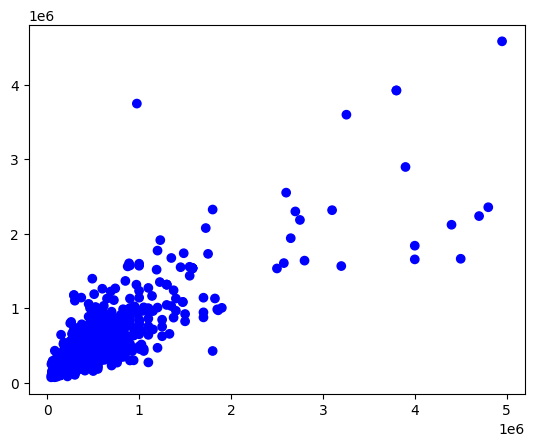

In [46]:
colors = ['r' if val != val else 'b' for val in p]
plt.scatter(y_test,p,c=colors)

In [47]:
best_params = rf_random.best_params_
best_score = rf_random.best_score_

print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Check the score of the best model on the test set
best_model = rf_random.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Best Score: -127102038942.48608
Test Set Score: 0.6952092842134876
